In [24]:
import pandas as pd
df = pd.read_csv("mirror_publications_etherscan.csv")

df

,Writing NFT,Author Homepage,Total Sold(ETH),Total Sold Numbers,Total Buyers,Price(ETH),nft_address,collection,fees,created_date,...,week_google_searches_nft,week_google_searches_crypto,week_google_searches_bitcoin,week_google_searches_ethereum,week_google_searches_optimism,Success,SuccessBinary,author_address,author_ether_balance,author_transactions_number
0,https://opensea.io/assets/optimism/0x26bbb507d...,https://mirror.xyz/0xf4cdb62c9a66c749cdf736c43...,0.5900,59,53,0.0100,0x26bbb507daa7c0dec6a578a09f0d7ac85ff6fec5,man1f3st0,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,59000.0,1,0xf4cdb62c9a66c749cdf736c43e96ff11d2bab444,0.014894,10.0
1,https://opensea.io/assets/optimism/0x3e21e1d8e...,https://mirror.xyz/0x4ced9817cad891aeffbf5fb7d...,2.0000,200,198,0.0100,0x3e21e1d8e89d675aca9708aee0ae05c7f6622c29,canto-genesis,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,200000.0,1,0x4ced9817cad891aeffbf5fb7dcb6f3c6aebd4228,0.016364,2.0
2,https://opensea.io/assets/optimism/0xdd81b24ec...,https://mirror.xyz/0xb8dbf8e09c1cb83da9632e137...,0.0001,1,1,0.0001,0xdd81b24ec7813d0fc8570bfd5008271037122349,niswap-airdrop-iron,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,10.0,0,0xb8dbf8e09c1cb83da9632e137559a4471646d633,0.000000,0.0
3,https://opensea.io/assets/optimism/0xd283a8373...,https://mirror.xyz/0xc065e02d562cc390f35693059...,0.0000,53,53,0.0001,0xd283a8373ada1285547bba0d36556ea47ac25c54,trading-on-kwenta-mobile,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,530.0,1,0xc065e02d562cc390f3569305990bfd13b17eec6b,0.000098,10.0
4,https://opensea.io/assets/optimism/0x3fada15d6...,https://mirror.xyz/0x0df68ee531dab63d651132c7f...,0.0000,2,2,0.0001,0x3fada15d698a86a23e871d9b1bea9877e38e1e6b,some-words-about-rabbithole,"[2.5, 10.0]",2022-08-16,...,74,49,36,56,35,20.0,0,0x0df68ee531dab63d651132c7f56c6cdfe2689d19,0.010063,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26870,https://opensea.io/assets/optimism/0x81457615f...,https://mirror.xyz/0xd5f09257a7b7d070c39e6b473...,0.0000,2,2,0.0001,0x81457615fcd852e1d51ec8273d0ef6e95e4a7da6,unlock-the-full-potential-of-safe-wallet-sign-...,[2.5],2024-11-18,...,26,100,84,53,43,20.0,0,0xd5f09257a7b7d070c39e6b4737933324456b6211,0.092097,10.0
26871,https://opensea.io/assets/optimism/0xd84035bc2...,https://mirror.xyz/0x489e3e846bb550cb7b023108c...,0.0000,5,5,0.0001,0xd84035bc253d7ab99d3e05c1d1f6d1185300a602,the-governance-staking-era,[2.5],2024-11-18,...,26,100,84,53,43,50.0,1,0x489e3e846bb550cb7b023108ce071bb39fd23cd8,0.012132,10.0
26872,https://opensea.io/assets/optimism/0x3403ab72d...,https://mirror.xyz/0x5ee94b80d60880f25048b6158...,0.0000,1,1,0.0001,0x3403ab72df88717d4b9067fc08daf07949bab830,superchain-sunday-week-46-2024,[2.5],2024-11-18,...,26,100,84,53,43,10.0,0,0x5ee94b80d60880f25048b61588d8cb23c79aa3ae,0.014976,10.0
26873,https://opensea.io/assets/optimism/0x9fff9c16f...,https://mirror.xyz/0x9ad0cb287b57828a2fb2b738d...,0.0000,4,4,0.0001,0x9fff9c16fde288329a2b663697ef2d04e967b4a9,the-morpho-dao-to-enable-transferability-for-m...,[2.5],2024-11-18,...,26,100,84,53,43,40.0,1,0x9ad0cb287b57828a2fb2b738da2e2f4727eaed28,0.000000,0.0


<h2 style="color: red;">Preparazione 1: undersampling sulla classe maggioritaria</h2>

In [28]:
print("Attuale conteggio delle classi:")
counts = df['SuccessBinary'].value_counts()
print(counts)

print("Faccio undersampling per avere le classi perfettamente bilanciate\n")

from sklearn.utils import resample

df_majority = df[df["SuccessBinary"] == 1]
df_minority = df[df["SuccessBinary"] == 0]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=len(df_minority),  #in modo da classe maggioritaria = classe minoritaria
                                   random_state=42)

df = pd.concat([df_majority_downsampled, df_minority]).reset_index(drop=True)

print("Conteggio delle classi dopo il bilanciamento:")
counts = df['SuccessBinary'].value_counts()
print(counts)

Attuale conteggio delle classi:
SuccessBinary
1    13552
0    13323
Name: count, dtype: int64
Faccio undersampling per avere le classi perfettamente bilanciate

Conteggio delle classi dopo il bilanciamento:
SuccessBinary
1    13323
0    13323
Name: count, dtype: int64


<h2 style="color: red;">Preparazione 2: suddivisione in train e test e standardizzazione</h2>

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns= #prendo tutte le colonne del dataset tranne quelle elencate qua sotto:
            ['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers', 'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language', 'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic", 'transaction_id', 'publication_date', 'year_month', 'author_address', #colonne da non utilizzare
            'Success', 'SuccessBinary'] #colonne target
            )

y = df['SuccessBinary']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style="color: red;">Modello 1: classificazione binaria con Gradient Boost</h1>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2665
           1       0.87      0.91      0.89      2665

    accuracy                           0.89      5330
   macro avg       0.89      0.89      0.89      5330
weighted avg       0.89      0.89      0.89      5330

Confusion matrix:


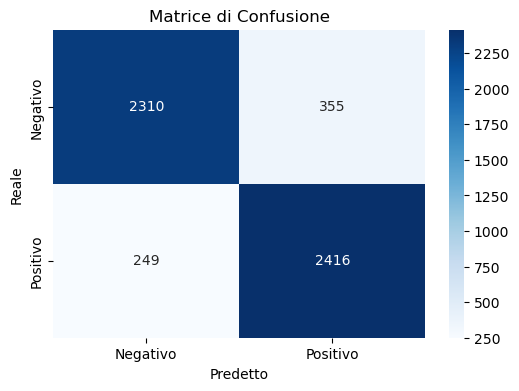

                            Feature  Importance
55                 authorTotalSales    0.351014
56               authorTotalRevenue    0.337823
54                  authorPostCount    0.179781
41                 days_since_epoch    0.006251
85  optimism_active_addresses_total    0.005601
92       author_transactions_number    0.005351
91             author_ether_balance    0.004633
19                FleschReadingEase    0.004346
22                    syll_per_word    0.004318
21              characters_per_word    0.004192
44                      max_btc_usd    0.003420
50                      max_eth_usd    0.003279
81      daily_transactions_optimism    0.002700
15                    verbs_density    0.002558
17                    nouns_density    0.002484
23               words_per_sentence    0.002451
73                         vol_usdc    0.002387
42                     last_btc_usd    0.002350
7              normalized_tfidf_sum    0.002243
71                     max_usdc_usd    0

/var/folders/7s/nk6tlb4x0430nvtq2mh4r4gr0000gn/T/ipykernel_56698/1451330078.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top20_features, palette="Blues_d")


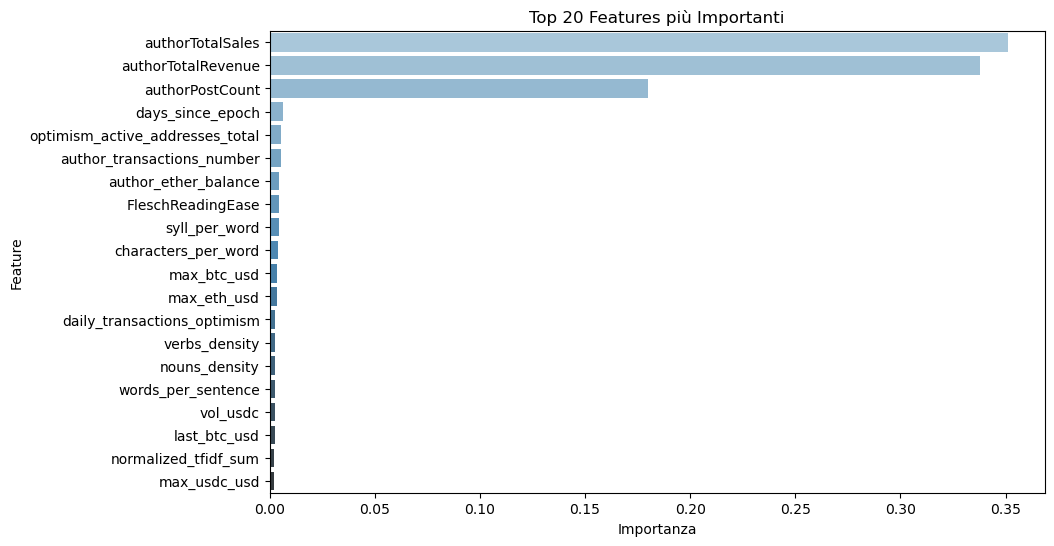

In [36]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='accuracy',
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title(f"Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

<h1 style="color: red;">Modello 2: classificazione binaria con Multi-Layer Perceptron</h1>

Trial 20 Complete [00h 00m 22s]
val_accuracy: 0.6751875877380371

Best val_accuracy So Far: 0.73968106508255
Total elapsed time: 00h 07m 40s
Migliori iperparametri trovati
 - Unità nel primo livello: 160
 - Unità nel secondo livello: 224
 - Tasso di dropout 1: 0.30000000000000004
 - Tasso di dropout 2: 0.5
 - L2 rate: 5.5795165413353476e-05
 - Learning rate: 0.0001


Epoch 1/100
533/533 [==============================] - 1s 891us/step - loss: 0.7237 - accuracy: 0.5405 - val_loss: 0.6959 - val_accuracy: 0.6152
Epoch 2/100
533/533 [==============================] - 0s 805us/step - loss: 0.7006 - accuracy: 0.5822 - val_loss: 0.6738 - val_accuracy: 0.6466
Epoch 3/100
533/533 [==============================] - 0s 800us/step - loss: 0.6805 - accuracy: 0.6189 - val_loss: 0.6613 - val_accuracy: 0.6562
Epoch 4/100
533/533 [==============================] - 0s 798us/step - loss: 0.6675 - accuracy: 0.6357 - val_loss: 0.6533 - val_accuracy: 0.6597
Epoch 5/100
533/533 [==============================] - 0s 803us/step - loss: 0.6557 - accuracy: 0.6507 - val_loss: 0.6480 - val_accuracy: 0.6644
Epoch 6/100
533/533 [==============================] - 0s 809us/step - loss: 0.6521 - accuracy: 0.6542 - val_loss: 0.6441 - val_accuracy: 0.6656
Epoch 7/100
533/533 [==============================] - 0s 801us/step - loss: 0.6434 - accuracy: 0.6595 - val_loss: 0.6411 - val_ac

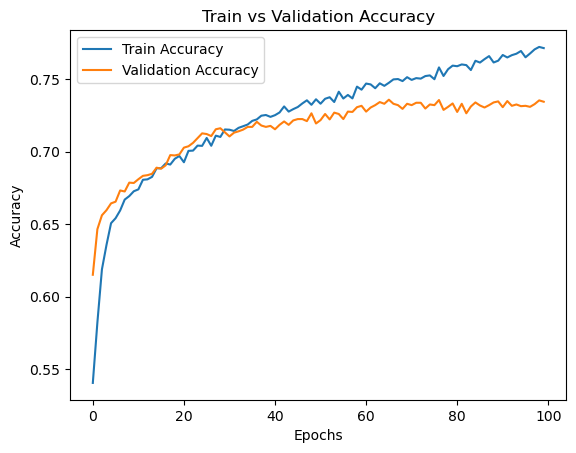

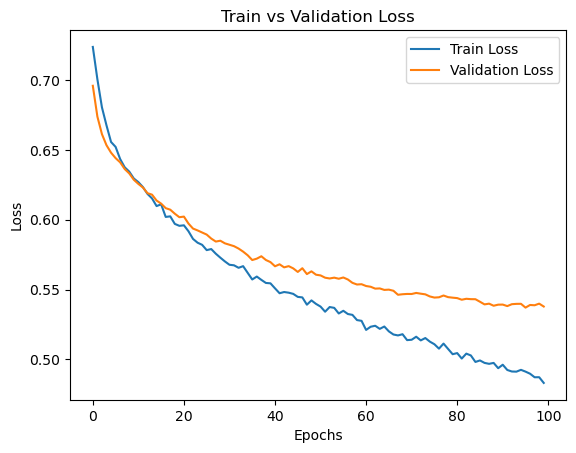

In [40]:
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(1, activation='sigmoid'))

    #compilazione
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

167/167 [==============================] - 0s 279us/step


/var/folders/7s/nk6tlb4x0430nvtq2mh4r4gr0000gn/T/ipykernel_56698/2925185085.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top20_features, palette="Blues_d")


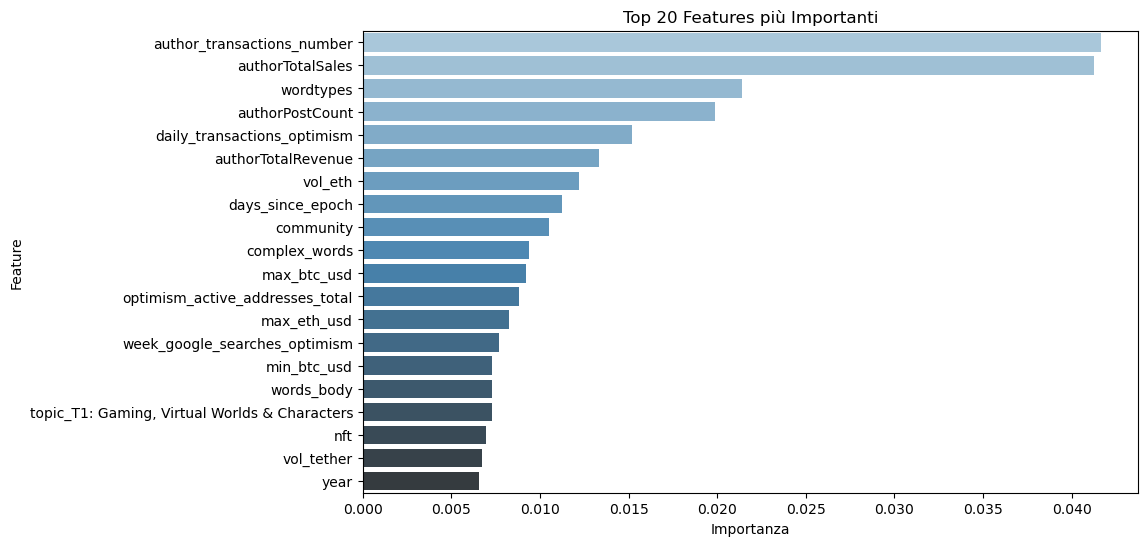

                                          Feature  Importance
92                     author_transactions_number    0.041651
55                               authorTotalSales    0.041276
29                                      wordtypes    0.021388
54                                authorPostCount    0.019887
81                    daily_transactions_optimism    0.015197
56                             authorTotalRevenue    0.013321
52                                        vol_eth    0.012195
41                               days_since_epoch    0.011257
10                                      community    0.010507
33                                  complex_words    0.009381
44                                    max_btc_usd    0.009193
85                optimism_active_addresses_total    0.008818
50                                    max_eth_usd    0.008255
90                  week_google_searches_optimism    0.007692
45                                    min_btc_usd    0.007317
4       

In [42]:
import numpy as np
from sklearn.metrics import accuracy_score

# Funzione per calcolare l'importanza delle feature tramite permutazione
def permutation_importance(model, X_test, y_test, metric=accuracy_score):
    # Otteniamo l'accuratezza del modello originale
    baseline_score = metric(y_test, (model.predict(X_test) > 0.5).astype(int))
    
    importances = []
    
    for i in range(X_test.shape[1]):
        # Copiamo X_test per non modificare i dati originali
        X_test_permuted = X_test.copy()
        
        # Permutiamo la i-esima feature
        X_test_permuted[:, i] = np.random.permutation(X_test_permuted[:, i])
        
        # Calcoliamo la performance con la feature permutata
        permuted_score = metric(y_test, (model.predict(X_test_permuted) > 0.5).astype(int))
        
        # L'importanza è la differenza tra l'accuratezza originale e quella permutata
        importances.append(baseline_score - permuted_score)
    
    return np.array(importances)

# Calcoliamo l'importanza delle feature
importances = permutation_importance(best_model, X_test_scaled, y_test)

# Creiamo un DataFrame per visualizzare le importanze
feature_names = X.columns  # Usa i nomi originali delle feature
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Ordiniamo le feature in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Prendiamo le prime 20 feature
top20_features = feature_df.head(20)

# Visualizzazione grafica
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

# Stampa le prime 20 feature
print(top20_features)

<h2 style="color: red;">Preparazione 3: creazione delle colonna target SuccessClass3 e SuccessClass4 per classificazione multiclass</h2>

In [27]:
# Calcoliamo i terzili per dividere i dati in 3 classi bilanciate
terzili = df["Success"].quantile([1/3, 2/3]).values

# Creiamo la colonna "SuccessClass3" in base ai terzili
df["SuccessClass3"] = pd.cut(df["Success"], bins=[-float("inf"), terzili[0], terzili[1], float("inf")], labels=[0, 1, 2])

# Calcoliamo i quartili per dividere i dati in 4 classi bilanciate
quartili = df["Success"].quantile([1/4, 2/4, 3/4]).values

# Creiamo la colonna "SuccessClass4" in base ai quartili
df["SuccessClass4"] = pd.cut(df["Success"], bins=[-float("inf"), quartili[0], quartili[1], quartili[2], float("inf")], labels=[0, 1, 2, 3])

# Verifica delle distribuzioni
class_counts_3 = df["SuccessClass3"].value_counts()
class_counts_4 = df["SuccessClass4"].value_counts()

class_counts_3, class_counts_4

(SuccessClass3
 0    11745
 2     8736
 1     6394
 Name: count, dtype: int64,
 SuccessClass4
 0    8624
 3    6688
 2    5881
 1    5682
 Name: count, dtype: int64)

<h2 style="color: red;">Preparazione 4: nuova suddivisione in train e test per SuccessClass3</h2>

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns= #prendo tutte le colonne del dataset tranne quelle elencate qua sotto:
            ['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers', 'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language', 'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic", 'transaction_id', 'publication_date', 'year_month', 'author_address', #colonne da non utilizzare
            'Success', 'SuccessBinary', 'SuccessClass3', 'SuccessClass4'] #colonne target
            )

y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style="color: red;">Modello 3: classificazione multiclass con Gradient Boost (3 classi)</h1>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      2349
           1       0.67      0.59      0.63      1279
           2       0.81      0.90      0.85      1747

    accuracy                           0.81      5375
   macro avg       0.78      0.78      0.78      5375
weighted avg       0.80      0.81      0.80      5375

Confusion matrix:


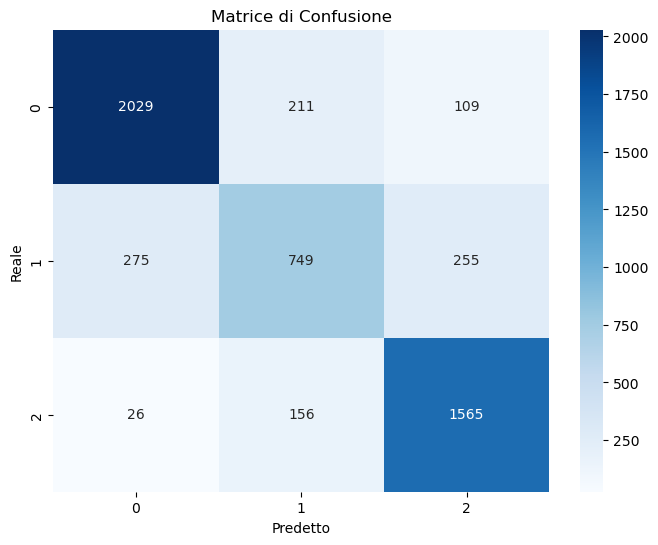

                            Feature  Importance
56               authorTotalRevenue    0.334831
55                 authorTotalSales    0.332934
54                  authorPostCount    0.165793
91             author_ether_balance    0.007291
85  optimism_active_addresses_total    0.006733
41                 days_since_epoch    0.006501
21              characters_per_word    0.004356
92       author_transactions_number    0.004315
7              normalized_tfidf_sum    0.004262
86         week_google_searches_nft    0.003937
73                         vol_usdc    0.003627
23               words_per_sentence    0.003476
17                    nouns_density    0.003317
31                       paragraphs    0.002961
18                          Kincaid    0.002947
22                    syll_per_word    0.002891
81      daily_transactions_optimism    0.002885
19                FleschReadingEase    0.002880
48                     last_eth_usd    0.002788
25                 type_token_ratio    0

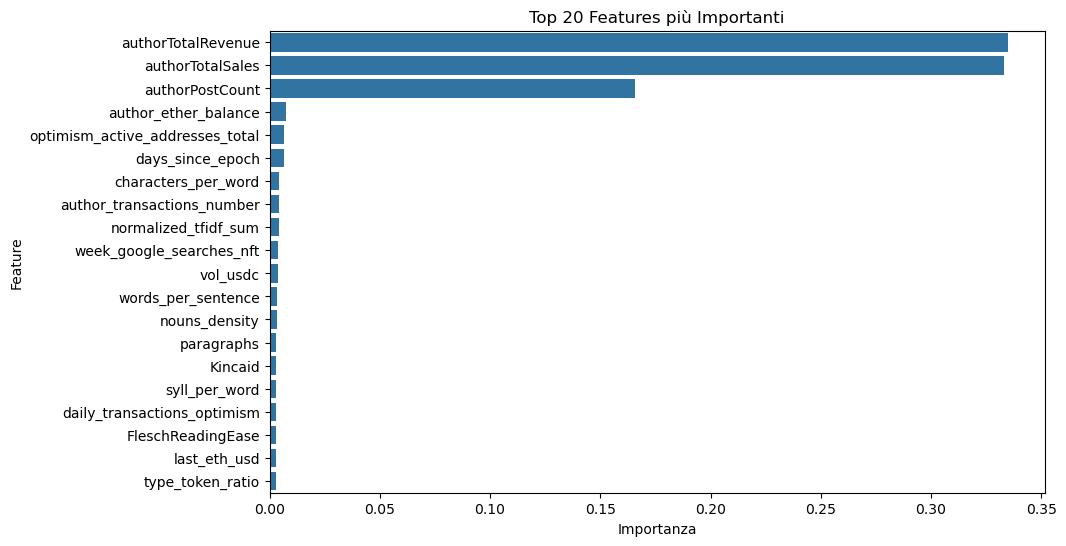

In [33]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='balanced_accuracy', #uso balanced_accuracy invece di accuracy in quanto le classi sono sbilanciate
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#prendo etichette delle classi uniche
class_labels = np.unique(y_test)

print("Confusion matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

<h2 style="color: red;">Preparazione 5: nuova suddivisione in train e test per SuccessClass4</h2>

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns= #prendo tutte le colonne del dataset tranne quelle elencate qua sotto:
            ['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers', 'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language', 'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic", 'transaction_id', 'publication_date', 'year_month', 'author_address', #colonne da non utilizzare
            'Success', 'SuccessBinary', 'SuccessClass3', 'SuccessClass4'] #colonne target
            )

y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style="color: red;">Modello 4: classificazione multiclass con Gradient Boost (4 classi)</h1>

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Migliori parametri: {'subsample': 0.9, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.01}
Report di classificazione
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      1725
           1       0.66      0.54      0.60      1136
           2       0.63      0.69      0.66      1176
           3       0.79      0.88      0.83      1338

    accuracy                           0.74      5375
   macro avg       0.73      0.73      0.73      5375
weighted avg       0.74      0.74      0.74      5375

Confusion matrix:


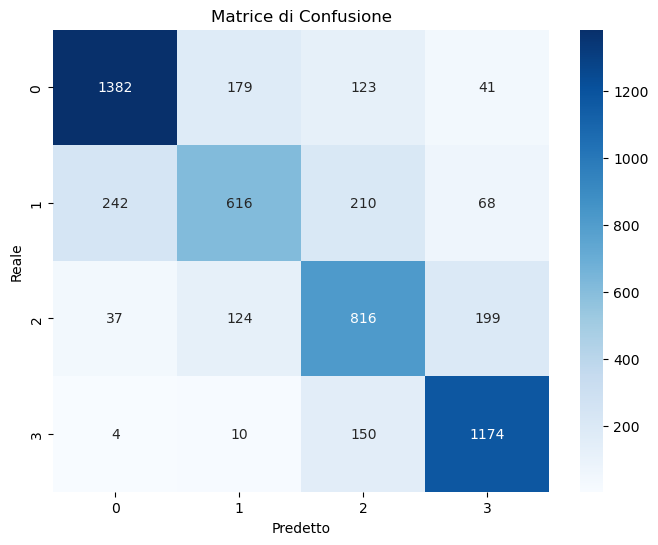

                            Feature  Importance
55                 authorTotalSales    0.338441
56               authorTotalRevenue    0.302520
54                  authorPostCount    0.165274
85  optimism_active_addresses_total    0.007121
41                 days_since_epoch    0.006896
91             author_ether_balance    0.006655
17                    nouns_density    0.005259
42                     last_btc_usd    0.004947
23               words_per_sentence    0.004835
21              characters_per_word    0.004562
7              normalized_tfidf_sum    0.004335
81      daily_transactions_optimism    0.004152
3            cleaned_text_sentiment    0.003878
86         week_google_searches_nft    0.003695
15                    verbs_density    0.003679
20                  GunningFogIndex    0.003618
16               adjectives_density    0.003488
73                         vol_usdc    0.003473
25                 type_token_ratio    0.003464
22                    syll_per_word    0

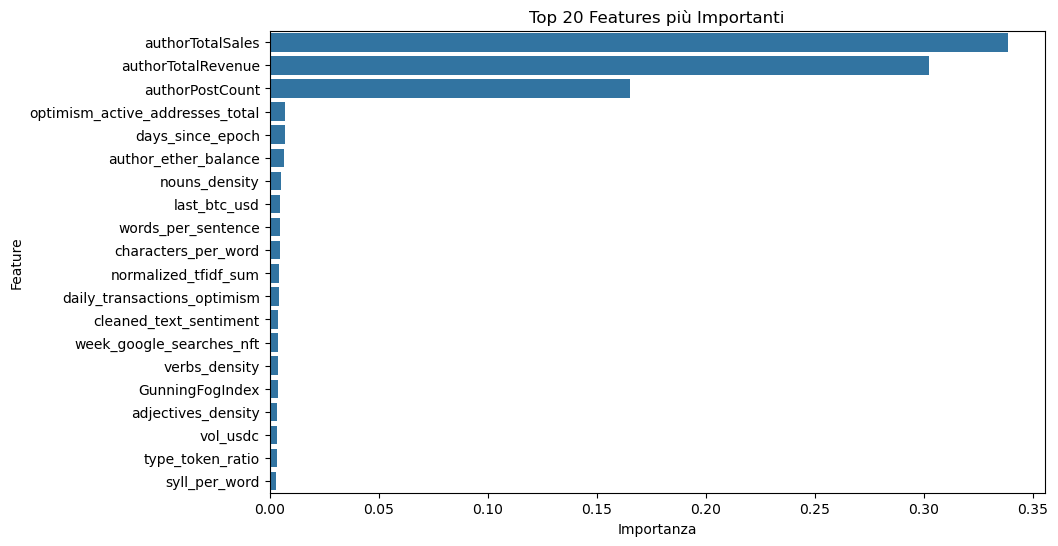

In [44]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#spazio degli iperparametri per cross-validation
param_dist = {
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 500],
    'subsample': [0.7, 0.8, 0.9, 1.0],  #percentuale di campioni da usare per ogni albero
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
}

#cv con random search
random_search = RandomizedSearchCV(
GradientBoostingClassifier(random_state=42),
param_distributions=param_dist,
n_iter=20,  #numero di combinazioni da provare
scoring='balanced_accuracy', #uso balanced_accuracy invece di accuracy in quanto le classi sono sbilanciate
cv=5,  #5-fold cross-validation
verbose=1,
random_state=42,
n_jobs=-1
)

#ricerca degli iperparametri
random_search.fit(X_train_scaled, y_train)
    
#stampa dei migliori parametri trovati
print(f"Migliori parametri: {random_search.best_params_}")
    
#predizione del modello usando i parametri migliori
y_pred = random_search.best_estimator_.predict(X_test_scaled)
    
#stampa report di classificazione
print("Report di classificazione")
print(classification_report(y_test, y_pred))

#stampa confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#prendo etichette delle classi uniche
class_labels = np.unique(y_test)

print("Confusion matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predetto")
plt.ylabel("Reale")
plt.title("Matrice di Confusione")
plt.show()

#feature importance
feature_importances = random_search.best_estimator_.feature_importances_

#creo un df per ordinare le features
feature_names = X_train.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
#le ordino in base all'importanza
feature_df = feature_df.sort_values(by='Importance', ascending=False)

#prendo le prime 20 features
top20_features = feature_df.head(20)
#le stampo
print(top20_features)
#le visualizzo graficamente
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top20_features)
plt.title('Top 20 Features più Importanti')
plt.xlabel('Importanza')
plt.ylabel('Feature')
plt.show()

<h2 style="color: red;">Preparazione 6: nuova suddivisione in train e test per SuccessClass3</h2>

In [48]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns= #prendo tutte le colonne del dataset tranne quelle elencate qua sotto:
            ['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers', 'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language', 'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic", 'transaction_id', 'publication_date', 'year_month', 'author_address', #colonne da non utilizzare
            'Success', 'SuccessBinary', 'SuccessClass3', 'SuccessClass4'] #colonne target
            )

y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style="color: red;">Modello 5: classificazione multiclass con Multi-Layer Perceptron (3 classi)</h1>

Reloading Tuner from ./untitled_project/tuner0.json
Migliori iperparametri trovati
 - Unità nel primo livello: 160
 - Unità nel secondo livello: 224
 - Tasso di dropout 1: 0.30000000000000004
 - Tasso di dropout 2: 0.5
 - L2 rate: 5.5795165413353476e-05
 - Learning rate: 0.0001
Epoch 1/100
538/538 [==============================] - 1s 943us/step - loss: 1.1214 - accuracy: 0.4163 - val_loss: 1.0758 - val_accuracy: 0.4853
Epoch 2/100
538/538 [==============================] - 0s 839us/step - loss: 1.0840 - accuracy: 0.4634 - val_loss: 1.0562 - val_accuracy: 0.5163
Epoch 3/100
538/538 [==============================] - 0s 839us/step - loss: 1.0630 - accuracy: 0.4834 - val_loss: 1.0389 - val_accuracy: 0.5263
Epoch 4/100
538/538 [==============================] - 0s 842us/step - loss: 1.0463 - accuracy: 0.5039 - val_loss: 1.0272 - val_accuracy: 0.5312
Epoch 5/100
538/538 [==============================] - 0s 845us/step - loss: 1.0349 - accuracy: 0.5141 - val_loss: 1.0148 - val_accuracy: 0.5

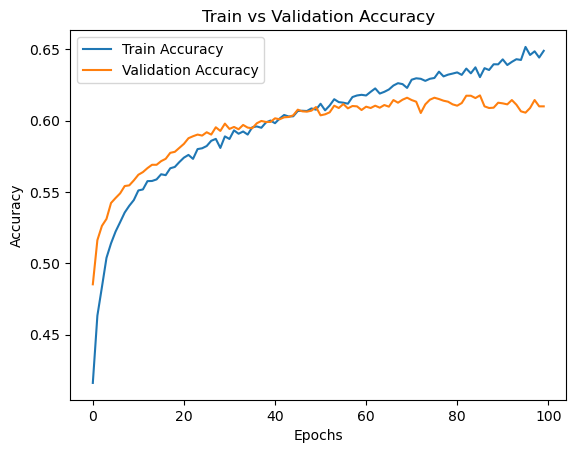

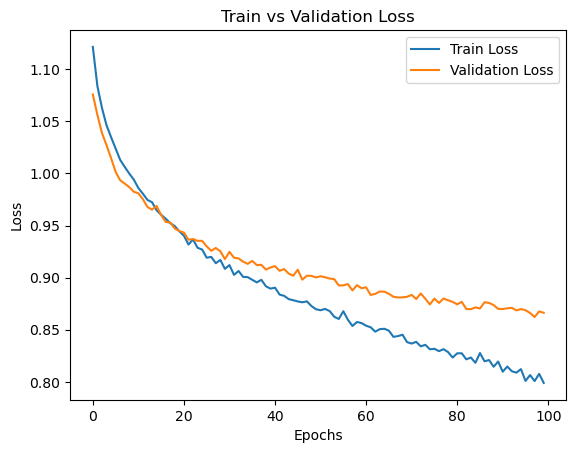

In [52]:
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(3, activation='softmax')) #softmax invece di sigmoid per classificazione non binaria

    #compilazione
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy', #invece di binary_crossentropy
        metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

<h2 style="color: red;">Preparazione 7: nuova suddivisione in train e test per SuccessClass4</h2>

In [58]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns= #prendo tutte le colonne del dataset tranne quelle elencate qua sotto:
            ['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers', 'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language', 'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic", 'transaction_id', 'publication_date', 'year_month', 'author_address', #colonne da non utilizzare
            'Success', 'SuccessBinary', 'SuccessClass3', 'SuccessClass4'] #colonne target
            )

y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style="color: red;">Modello 6: classificazione multiclass con Multi-Layer Perceptron (4 classi)</h1>

Reloading Tuner from ./untitled_project/tuner0.json
Migliori iperparametri trovati
 - Unità nel primo livello: 160
 - Unità nel secondo livello: 224
 - Tasso di dropout 1: 0.30000000000000004
 - Tasso di dropout 2: 0.5
 - L2 rate: 5.5795165413353476e-05
 - Learning rate: 0.0001
Epoch 1/100
538/538 [==============================] - 1s 881us/step - loss: 1.4526 - accuracy: 0.2996 - val_loss: 1.3867 - val_accuracy: 0.3656
Epoch 2/100
538/538 [==============================] - 0s 818us/step - loss: 1.4002 - accuracy: 0.3297 - val_loss: 1.3706 - val_accuracy: 0.3823
Epoch 3/100
538/538 [==============================] - 0s 800us/step - loss: 1.3747 - accuracy: 0.3628 - val_loss: 1.3419 - val_accuracy: 0.4019
Epoch 4/100
538/538 [==============================] - 0s 786us/step - loss: 1.3523 - accuracy: 0.3801 - val_loss: 1.3209 - val_accuracy: 0.4051
Epoch 5/100
538/538 [==============================] - 0s 792us/step - loss: 1.3432 - accuracy: 0.3916 - val_loss: 1.3110 - val_accuracy: 0.4

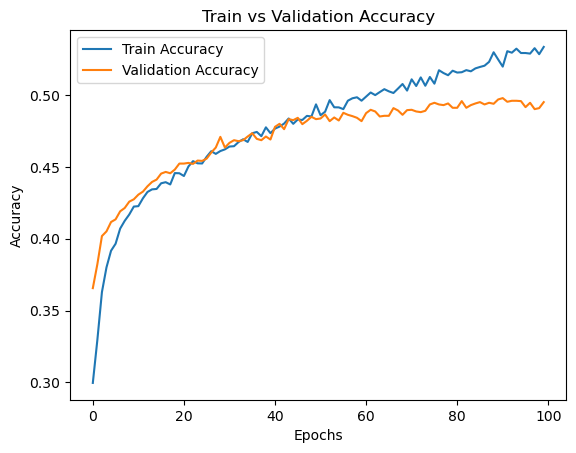

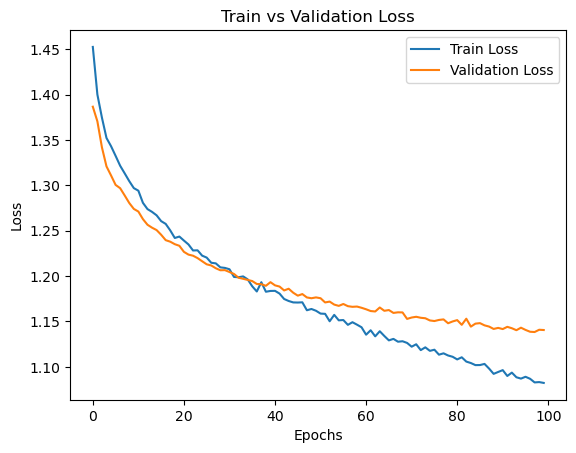

In [62]:
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(4, activation='softmax')) #softmax invece di sigmoid per classificazione non binaria

    #compilazione
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy', #invece di binary_crossentropy
        metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

<h2 style="color: red;">Preparazione 8: undersampling su SuccessClass3 e SuccessClass4</h2>

In [66]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
df = rus.fit_resample(df, df["SuccessClass3"])[0]

rus = RandomUnderSampler(random_state=42)
df = rus.fit_resample(df, df["SuccessClass4"])[0]

# Verifica delle distribuzioni
class_counts_3 = df["SuccessClass3"].value_counts()
class_counts_4 = df["SuccessClass4"].value_counts()

class_counts_3, class_counts_4

(SuccessClass3
 0    5907
 1    5615
 2    5414
 Name: count, dtype: int64,
 SuccessClass4
 0    4234
 1    4234
 2    4234
 3    4234
 Name: count, dtype: int64)

<h2 style="color: red;">Preparazione 9: nuova suddivisione in train e test per SuccessClass3</h2>

In [70]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns= #prendo tutte le colonne del dataset tranne quelle elencate qua sotto:
            ['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers', 'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language', 'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic", 'transaction_id', 'publication_date', 'year_month', 'author_address', #colonne da non utilizzare
            'Success', 'SuccessBinary', 'SuccessClass3', 'SuccessClass4'] #colonne target
            )

y = df['SuccessClass3']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style="color: red;">Modello 7: classificazione multiclass con Multi-Layer Perceptron (3 classi) - Classi bilanciate</h1>

Reloading Tuner from ./untitled_project/tuner0.json
Migliori iperparametri trovati
 - Unità nel primo livello: 160
 - Unità nel secondo livello: 224
 - Tasso di dropout 1: 0.30000000000000004
 - Tasso di dropout 2: 0.5
 - L2 rate: 5.5795165413353476e-05
 - Learning rate: 0.0001
Epoch 1/100
339/339 [==============================] - 1s 1ms/step - loss: 1.1676 - accuracy: 0.3552 - val_loss: 1.1000 - val_accuracy: 0.4100
Epoch 2/100
339/339 [==============================] - 0s 806us/step - loss: 1.1311 - accuracy: 0.3680 - val_loss: 1.0924 - val_accuracy: 0.4395
Epoch 3/100
339/339 [==============================] - 0s 810us/step - loss: 1.1178 - accuracy: 0.3831 - val_loss: 1.0845 - val_accuracy: 0.4542
Epoch 4/100
339/339 [==============================] - 0s 819us/step - loss: 1.0994 - accuracy: 0.4152 - val_loss: 1.0726 - val_accuracy: 0.4672
Epoch 5/100
339/339 [==============================] - 0s 807us/step - loss: 1.0951 - accuracy: 0.4231 - val_loss: 1.0647 - val_accuracy: 0.476

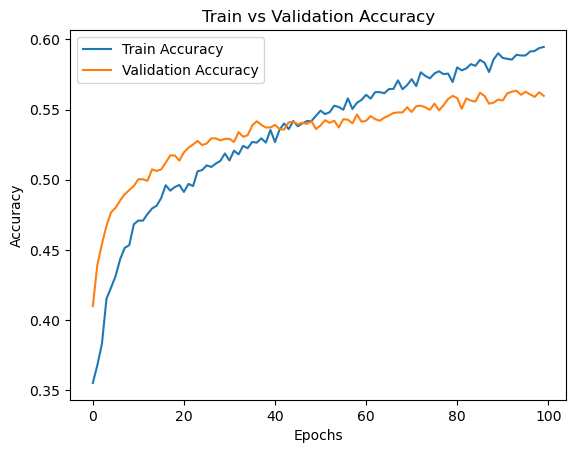

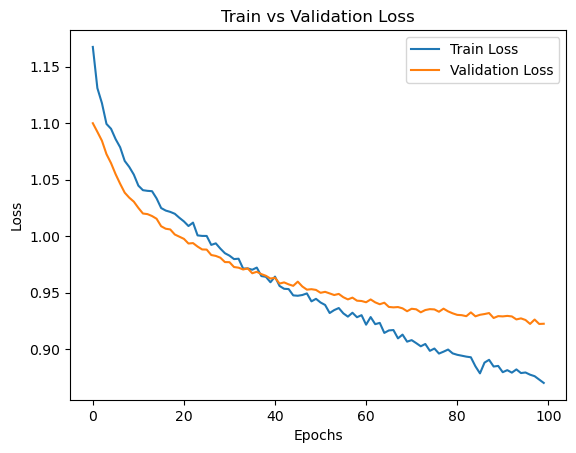

In [76]:
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(3, activation='softmax')) #softmax invece di sigmoid per classificazione non binaria

    #compilazione
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy', #invece di binary_crossentropy
        metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()

<h2 style="color: red;">Preparazione 10: nuova suddivisione in train e test per SuccessClass4</h2>

In [82]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns= #prendo tutte le colonne del dataset tranne quelle elencate qua sotto:
            ['Writing NFT', 'Author Homepage', 'Total Sold(ETH)', 'Total Sold Numbers', 'Total Buyers', 'Price(ETH)', 'nft_address', 'collection', 'fees', 'created_date', 'link', 'digest', 'body', 'timestamp', 'title', 'cleaned_text', 'cleaned_body', 'cleaned_title', 'processed_cleaned_text', 'weekday', 'language', 'cleaned_text_tokenized', 'cleaned_text_lemmatized', 'cleaned_text_POS', "topic", 'transaction_id', 'publication_date', 'year_month', 'author_address', #colonne da non utilizzare
            'Success', 'SuccessBinary', 'SuccessClass3', 'SuccessClass4'] #colonne target
            )

y = df['SuccessClass4']

#suddivisione train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#standardizzazione dei dati
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h1 style="color: red;">Modello 8: classificazione multiclass con Multi-Layer Perceptron (4 classi) - Classi bilanciate</h1>

Reloading Tuner from ./untitled_project/tuner0.json
Migliori iperparametri trovati
 - Unità nel primo livello: 160
 - Unità nel secondo livello: 224
 - Tasso di dropout 1: 0.30000000000000004
 - Tasso di dropout 2: 0.5
 - L2 rate: 5.5795165413353476e-05
 - Learning rate: 0.0001
Epoch 1/100
339/339 [==============================] - 1s 943us/step - loss: 1.4615 - accuracy: 0.2632 - val_loss: 1.3970 - val_accuracy: 0.3339
Epoch 2/100
339/339 [==============================] - 0s 797us/step - loss: 1.4234 - accuracy: 0.2810 - val_loss: 1.3870 - val_accuracy: 0.3494
Epoch 3/100
339/339 [==============================] - 0s 798us/step - loss: 1.4057 - accuracy: 0.2962 - val_loss: 1.3753 - val_accuracy: 0.3531
Epoch 4/100
339/339 [==============================] - 0s 796us/step - loss: 1.3882 - accuracy: 0.3209 - val_loss: 1.3604 - val_accuracy: 0.3594
Epoch 5/100
339/339 [==============================] - 0s 797us/step - loss: 1.3752 - accuracy: 0.3314 - val_loss: 1.3499 - val_accuracy: 0.3

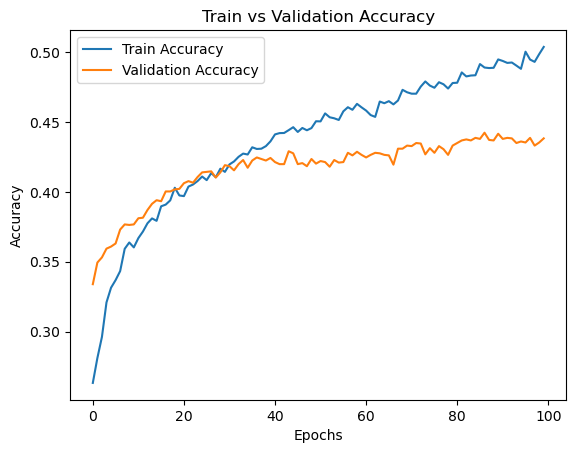

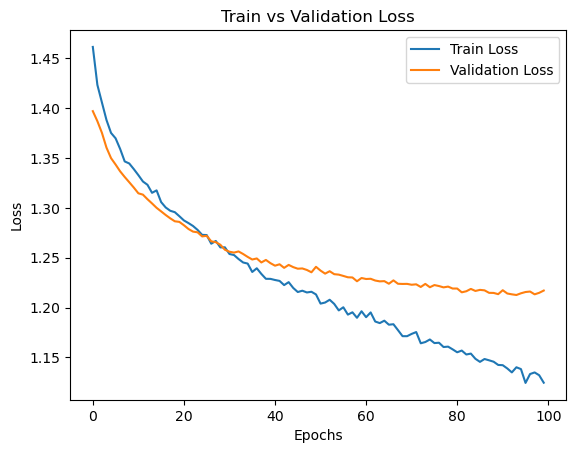

In [89]:
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

#costruisco il modello con regolarizzazione L2 ridge ed Early Stopping
def build_model(hp):
    model = Sequential()
    
    #1st hidden layer
    model.add(Dense(
        units=hp.Int('units_layer1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_dim=X_train_scaled.shape[1],
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate1', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #2nd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer2', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate2', min_value=0.1, max_value=0.5, step=0.1))) #dropout


    #3rd hidden layer
    model.add(Dense(
        units=hp.Int('units_layer3', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate3', min_value=0.1, max_value=0.5, step=0.1))) #dropout
    
    #4th hidden layer
    model.add(Dense(
        units=hp.Int('units_layer4', min_value=32, max_value=256, step=32),
        activation='relu',
        kernel_regularizer=l2(hp.Float('l2_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')) #reg l2
    ))
    model.add(Dropout(hp.Float('dropout_rate4', min_value=0.1, max_value=0.5, step=0.1))) #dropout

    #output layer
    model.add(Dense(4, activation='softmax')) #softmax invece di sigmoid per classificazione non binaria

    #compilazione
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy', #invece di binary_crossentropy
        metrics=['accuracy']
    )
    
    return model

#early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss', #monitora validation loss
    patience=10, #patience = numero di epoch senza miglioramento prima di fermarsi
    restore_best_weights=True # = ripristina i pesi del modello con la miglior performance
)

#configuro random search
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,
    executions_per_trial=1
)
    
#ricerca degli iperparametri
tuner.search(X_train_scaled, y_train, epochs=100, validation_split=0.2, verbose=1, callbacks=[early_stopping])
    
#stampa dei migliori parametri trovati
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Migliori iperparametri trovati")
print(f" - Unità nel primo livello: {best_hps.get('units_layer1')}")
print(f" - Unità nel secondo livello: {best_hps.get('units_layer2')}")
print(f" - Tasso di dropout 1: {best_hps.get('dropout_rate1')}")
print(f" - Tasso di dropout 2: {best_hps.get('dropout_rate2')}")
print(f" - L2 rate: {best_hps.get('l2_rate')}")
print(f" - Learning rate: {best_hps.get('learning_rate')}")

#costruisco il modello usando i parametri migliori
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1, callbacks=[early_stopping])

#valutazione sul test set
y_pred_proba = best_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_proba, axis=1)

#classification report
print(f"Classification Report:")
print(classification_report(y_test, y_pred))

#a seguito, visualizzazione dei plot della cronologia dell'addestramento: accuracy e loss
    
#accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Train vs Validation Accuracy')
plt.show()

#loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train vs Validation Loss')
plt.show()